# Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [4]:
df =  pd.read_csv('/content/rumah123_yogya.csv')
df.head(5)

,price,bed,bath,carport,surface_area(m2),building_area(m2),location
0,1790000000,3,3,2,120.0,110.0,Sleman
1,170000000,3,2,1,102.0,126.0,Sleman
2,695000000,2,2,1,100.0,100.0,Sleman
3,560000000,3,1,1,109.0,67.0,Sleman
4,200000000,2,1,1,60.0,30.0,Sleman


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1713 non-null   int64  
 1   bed                1713 non-null   int64  
 2   bath               1713 non-null   int64  
 3   carport            1713 non-null   int64  
 4   surface_area(m2)   1713 non-null   float64
 5   building_area(m2)  1713 non-null   float64
 6   location           1713 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 93.8+ KB


In [6]:
df.describe()

,price,bed,bath,carport,surface_area(m2),building_area(m2)
count,1.713000e+03,1713.000000,1713.000000,1713.000000,1713.000000,1.713000e+03
mean,1.685379e+09,3.816112,2.886748,1.559253,170.003503,1.405949e+06
std,2.295721e+09,3.386259,3.415710,1.283030,220.737962,5.818417e+07
min,7.000000e+06,1.000000,1.000000,1.000000,36.000000,4.000000e+00
25%,6.100000e+08,2.000000,1.000000,1.000000,94.000000,6.000000e+01
50%,9.500000e+08,3.000000,2.000000,1.000000,115.000000,9.700000e+01
75%,1.970000e+09,4.000000,3.000000,2.000000,161.000000,1.500000e+02
max,2.800000e+10,47.000000,47.000000,15.000000,4222.000000,2.408150e+09


In [7]:
df.isnull().sum()

,0
price,0
bed,0
bath,0
carport,0
surface_area(m2),0
building_area(m2),0
location,0


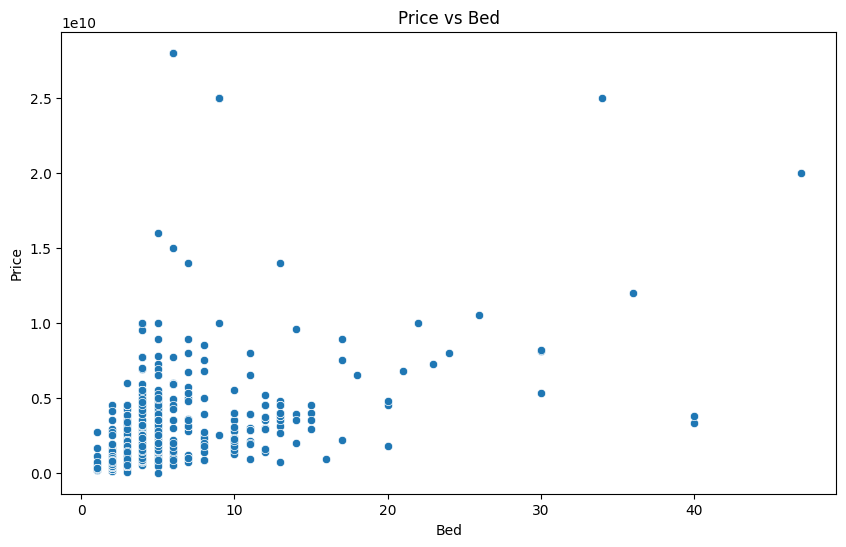

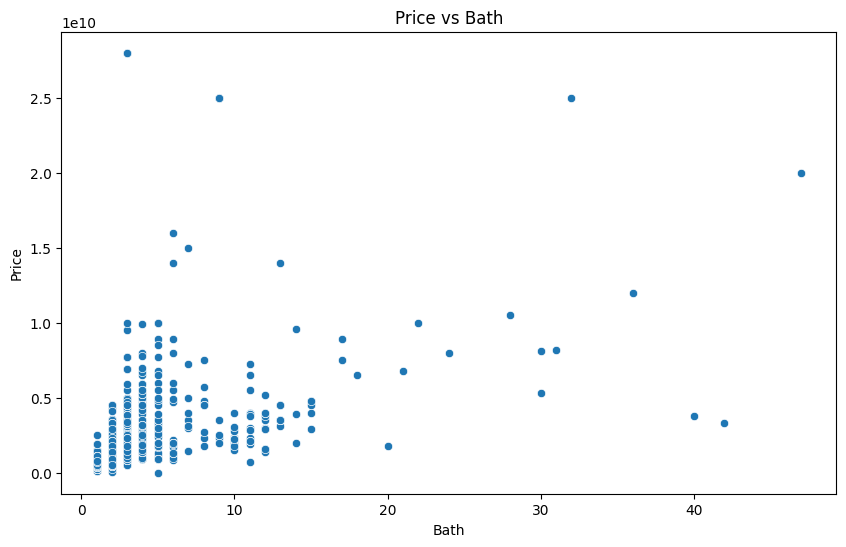

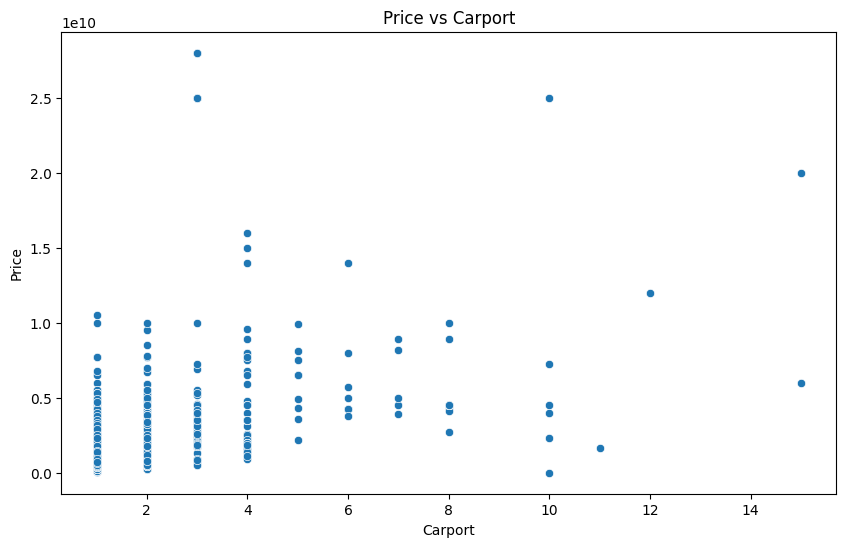

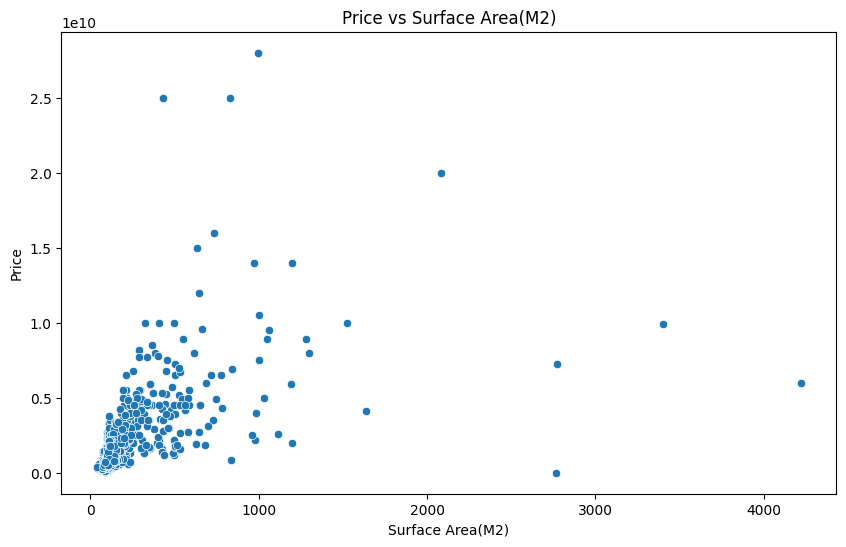

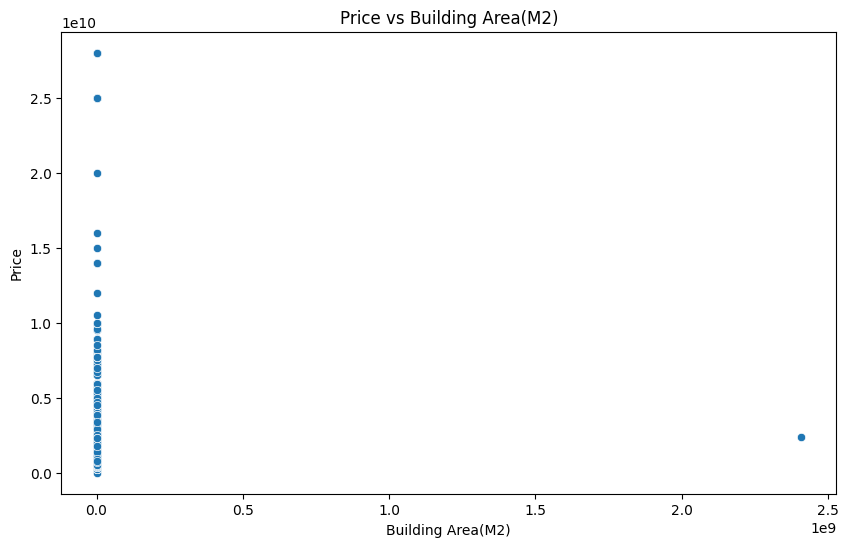

In [8]:
numerical_features = ['bed', 'bath', 'carport', 'surface_area(m2)', 'building_area(m2)']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Price')
    plt.show()

### Analisis Fitur Kategorikal



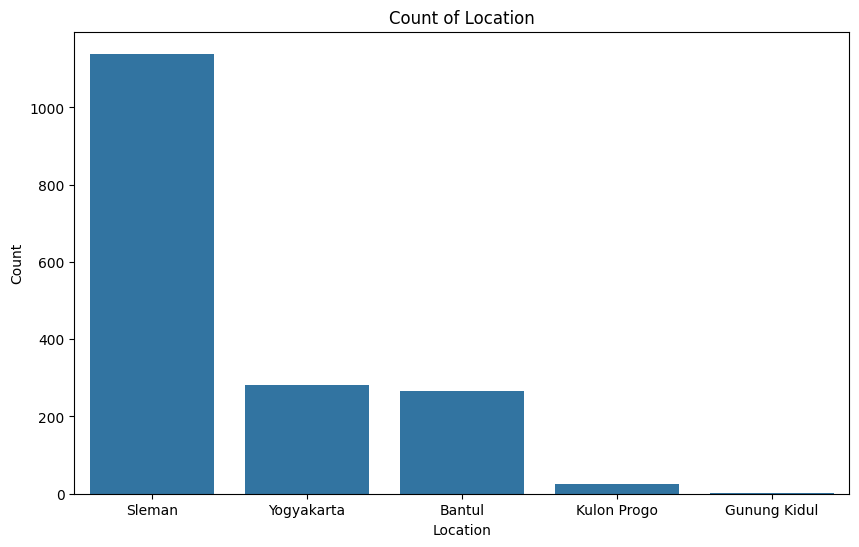

In [9]:
# Analyze categorical features
categorical_features = ['location']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()

Let's also analyze the relationship between the categorical features and the price.

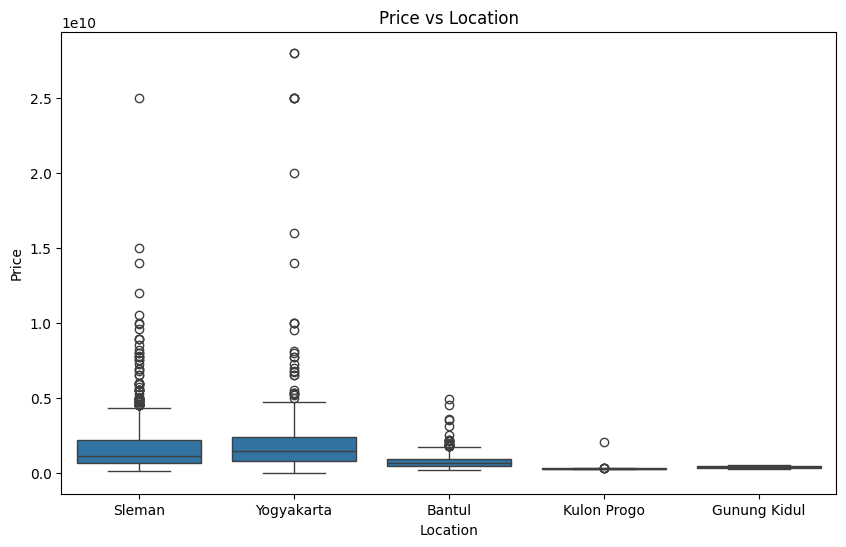

In [10]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Price')
    plt.show()

### Correlation Analysis

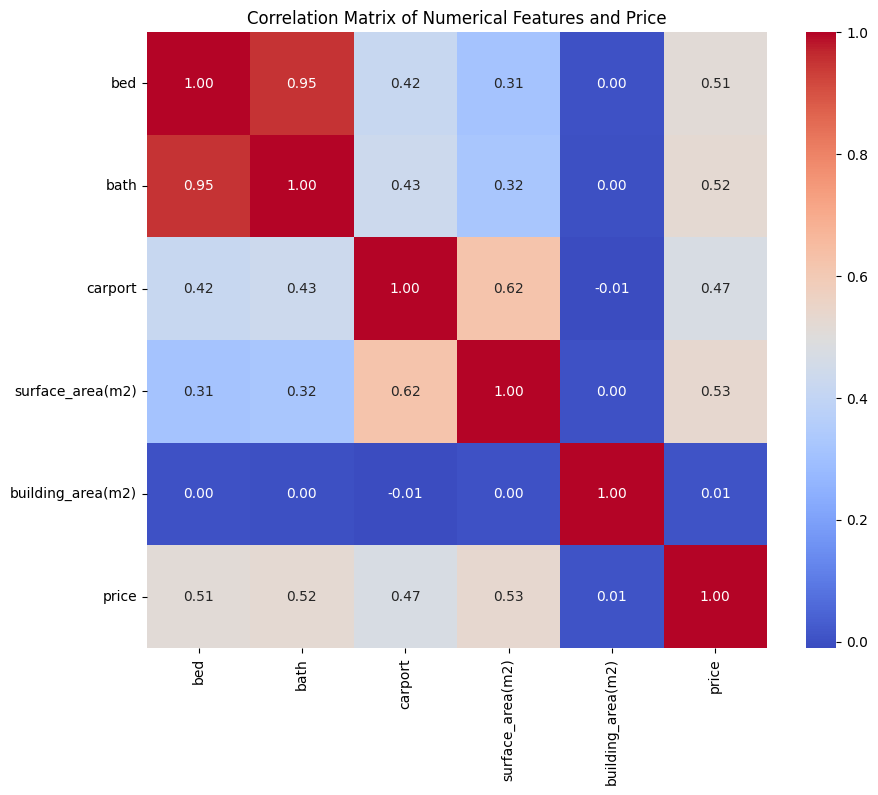

In [11]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features + ['price']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

## Identifikasi outliers


**Reasoning**:
To identify outliers in numerical features, I will create box plots for each numerical column, as box plots are effective for visualizing the distribution and potential outliers.



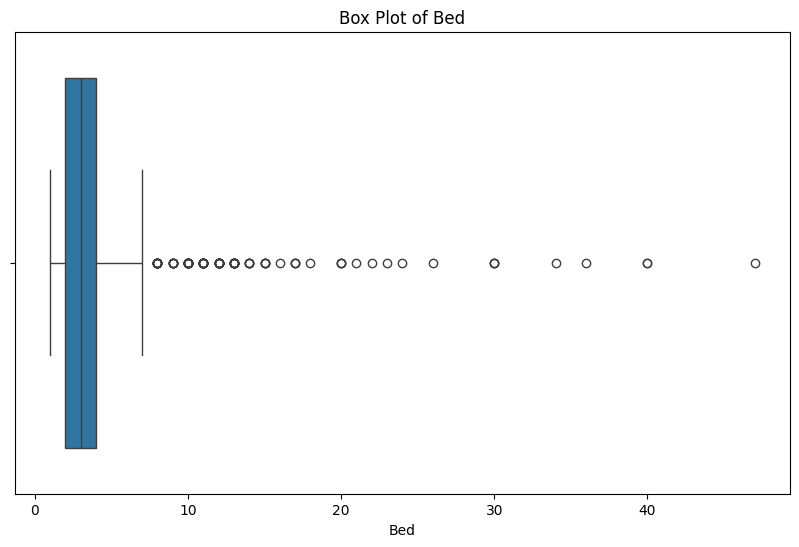

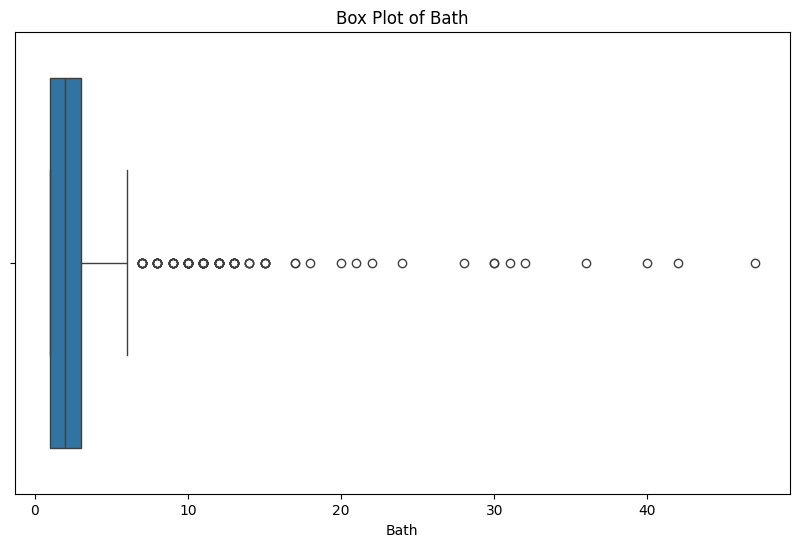

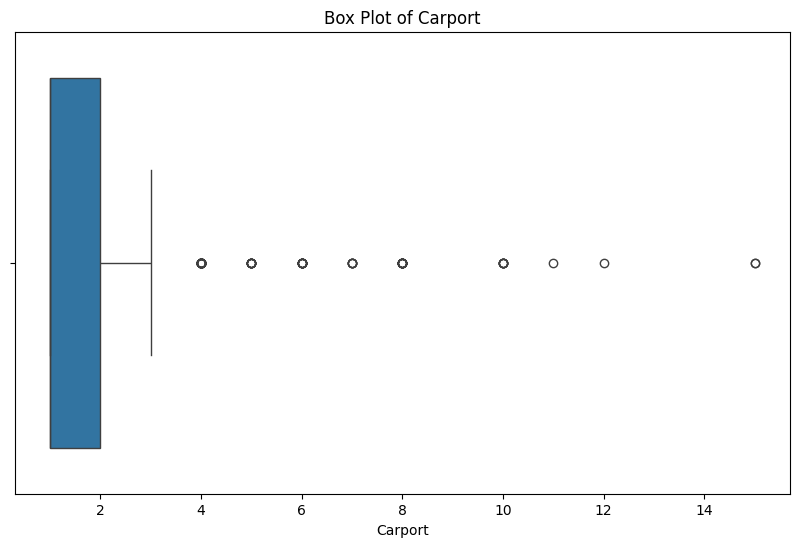

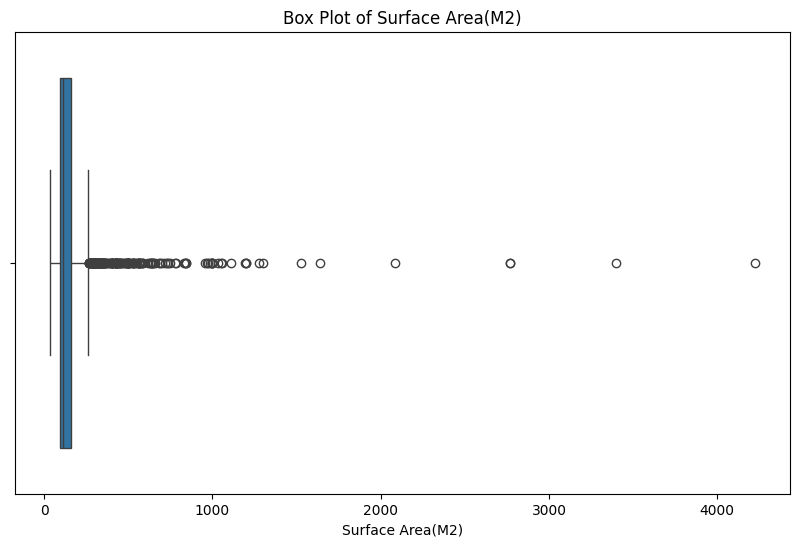

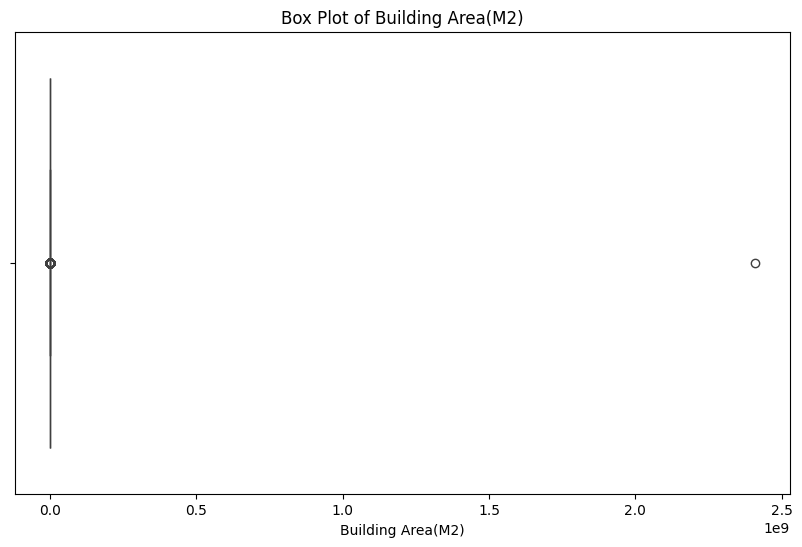

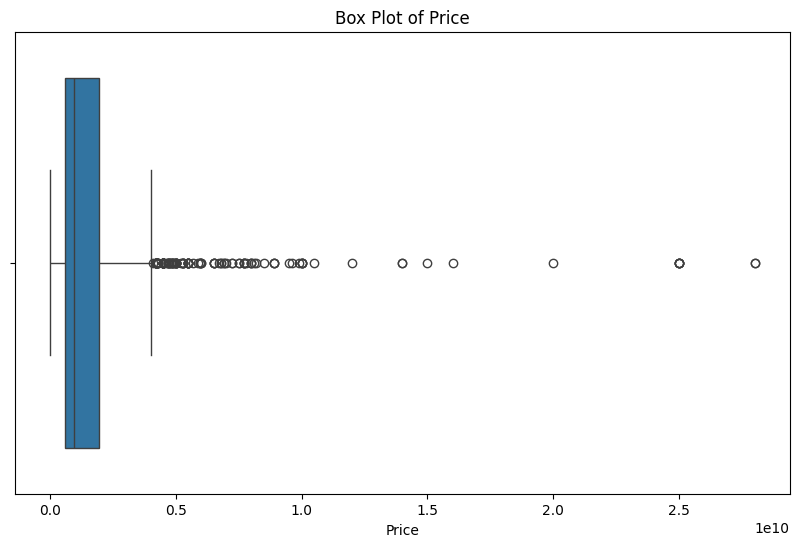

In [12]:
numerical_features = ['bed', 'bath', 'carport', 'surface_area(m2)', 'building_area(m2)', 'price']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.show()

## Implement the chosen method


In [13]:
features_to_cap = ['price', 'surface_area(m2)', 'building_area(m2)']

for feature in features_to_cap:
    percentile_99 = df[feature].quantile(0.99)
    df[feature] = df[feature].clip(upper=percentile_99)

display(df.describe())

,price,bed,bath,carport,surface_area(m2),building_area(m2)
count,1.713000e+03,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000
mean,1.602065e+09,3.816112,2.886748,1.559253,162.507110,136.247402
std,1.651150e+09,3.386259,3.415710,1.283030,147.866469,140.025596
min,7.000000e+06,1.000000,1.000000,1.000000,36.000000,4.000000
25%,6.100000e+08,2.000000,1.000000,1.000000,94.000000,60.000000
50%,9.500000e+08,3.000000,2.000000,1.000000,115.000000,97.000000
75%,1.970000e+09,4.000000,3.000000,2.000000,161.000000,150.000000
max,9.988000e+09,47.000000,47.000000,15.000000,999.760000,961.600000


## Verify the results


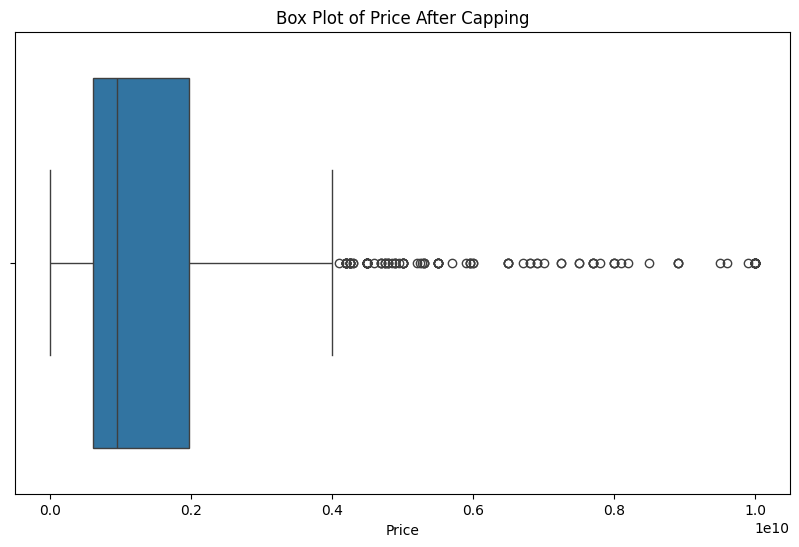

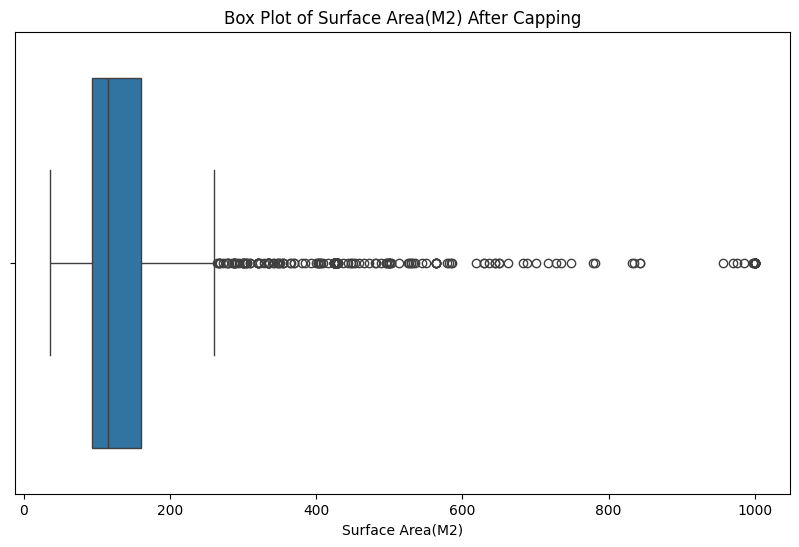

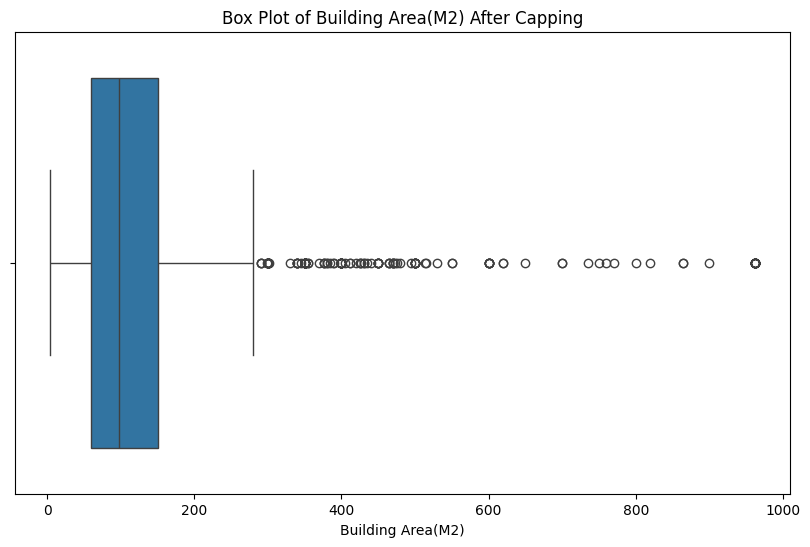

,price,bed,bath,carport,surface_area(m2),building_area(m2)
count,1.713000e+03,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000
mean,1.602065e+09,3.816112,2.886748,1.559253,162.507110,136.247402
std,1.651150e+09,3.386259,3.415710,1.283030,147.866469,140.025596
min,7.000000e+06,1.000000,1.000000,1.000000,36.000000,4.000000
25%,6.100000e+08,2.000000,1.000000,1.000000,94.000000,60.000000
50%,9.500000e+08,3.000000,2.000000,1.000000,115.000000,97.000000
75%,1.970000e+09,4.000000,3.000000,2.000000,161.000000,150.000000
max,9.988000e+09,47.000000,47.000000,15.000000,999.760000,961.600000


In [14]:
features_to_visualize_after_capping = ['price', 'surface_area(m2)', 'building_area(m2)']

for feature in features_to_visualize_after_capping:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()} After Capping')
    plt.xlabel(feature.replace("_", " ").title())
    plt.show()

display(df.describe())

## Ringkasan:

### Temuan Utama Analisis Data

* Diagram kotak menunjukkan outlier yang signifikan pada fitur numerik: `bed`, `bath`, `carport`, `surface_area(m2)`, `building_area(m2)`, dan `price`.
* Outlier pada `building_area(m2)` dan `price` diidentifikasi sebagai sangat ekstrem.
* Sebuah strategi diadopsi untuk membatasi outlier ekstrem pada `price`, `surface_area(m2)`, dan `building_area(m2)` pada persentil ke-99 untuk membatasi pengaruhnya.
* Outlier pada `bed`, `bath`, dan `carport` dipertahankan, dengan catatan untuk mempertimbangkan model yang robust selama pelatihan. * Penerapan strategi pembatasan berhasil mengurangi nilai maksimum untuk `harga`, `luas_permukaan(m2)`, dan `luas_bangunan(m2)`, sebagaimana dikonfirmasi oleh statistik deskriptif dan diagram kotak pasca-pembatasan.

### Wawasan atau Langkah Selanjutnya

* Metode penanganan outlier yang dipilih untuk `harga`, `luas_permukaan(m2)`, dan `luas_bangunan(m2)` secara efektif memitigasi dampak nilai ekstrem.
* Lanjutkan dengan analisis data lebih lanjut atau pelatihan model, dengan mempertimbangkan keputusan untuk mempertahankan outlier pada `kamar tidur`, `kamar mandi`, dan `carport` dan berpotensi menggunakan model yang robust terhadap outlier untuk fitur-fitur ini.

In [15]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x = df.drop(columns = ['price'])
y = df[['price']]
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1370, 6)
(343, 6)
(1370, 1)
(343, 1)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import numpy as np

test_model = [LinearRegression(),
              DecisionTreeRegressor(random_state =42),
              RandomForestRegressor(random_state =42),
              ExtraTreesRegressor(random_state =42),
              GradientBoostingRegressor(random_state =42),
              AdaBoostRegressor(random_state =42),
              XGBRegressor(random_state=42)]

model = ['Linear Regression',
         'Decision Tree Regressor',
         'Random Forest Regressor',
         'ExtraTrees Regressor',
         'GradientBoosting Regressor',
         'AdaBoost Regressor',
         'XGB Regressor']

result = pd.DataFrame(columns=['Model','MSE','RMSE','R2'])

for i, x in enumerate(test_model):
    # Melatih model
    x.fit(x_train, y_train)

    y_pred = x.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE using np.sqrt()
    r2 = r2_score(y_test, y_pred)

    results = pd.DataFrame({'Model':[model[i]],
                            'MSE':[mse],
                            'RMSE':[rmse],
                            'R2':[r2]})

    result = pd.concat([result, results], ignore_index=True)

display(result)

/tmp/ipython-input-16-3440565861.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, results], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConv

,Model,MSE,RMSE,R2
0,Linear Regression,0.007330,0.085614,0.793620
1,Decision Tree Regressor,0.010043,0.100213,0.717230
2,Random Forest Regressor,0.005331,0.073017,0.849884
3,ExtraTrees Regressor,0.004812,0.069365,0.864523
4,GradientBoosting Regressor,0.005991,0.077400,0.831322
5,AdaBoost Regressor,0.007649,0.087459,0.784630
6,XGB Regressor,0.006058,0.077835,0.829419


### Export Cleaned Dataset

In [17]:
# Define the output file path
output_file_path = 'rumah123_yogya_cleaned.csv'

# Export the cleaned DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"Cleaned dataset exported successfully to '{output_file_path}'")

Cleaned dataset exported successfully to 'rumah123_yogya_cleaned.csv'


In [27]:
# Sort and display the location labels
sorted_location_labels = sorted(le.classes_)
print("Sorted mapping of location labels:")
print(sorted_location_labels)

Sorted mapping of location labels:
['Bantul', 'Gunung Kidul', 'Kulon Progo', 'Sleman', 'Yogyakarta']


## Membuat Data Baru untuk Prediksi

In [38]:
# Create new data for prediction
new_data = {
    'bed': [4, 3],
    'bath': [3, 2],
    'carport': [2, 1],
    'surface_area(m2)': [150.0, 100.0],
    'building_area(m2)': [120.0, 90.0],
    'location': ['Sleman', 'Bantul']
}

new_df = pd.DataFrame(new_data)

# Display the new data
print("New data for prediction:")
display(new_df)

New data for prediction:


,bed,bath,carport,surface_area(m2),building_area(m2),location
0,4,3,2,150.0,120.0,Sleman
1,3,2,1,100.0,90.0,Bantul


#Prediksi menggunakan data baru

In [39]:
new_df['location'] = le.transform(new_df['location'])

# Scale the features of the new data
new_data_scaled = x_scaler.transform(new_df)

best_model = test_model[0]
new_predictions_scaled = best_model.predict(new_data_scaled)

# Inverse transform the predictions to the original scale
new_predictions = y_scaler.inverse_transform(new_predictions_scaled.reshape(-1, 1))

# Display the predictions
print("Predicted prices for the new data:")
for i, price in enumerate(new_predictions):
    print(f"Data point {i+1}: Rp {price[0]:,.2f}")

Predicted prices for the new data:
Data point 1: Rp 1,513,114,420.20
Data point 2: Rp 779,765,791.12
